In [1]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [62]:
from keras.datasets import imdb
from keras.layers import Dense, Embedding, Flatten, SimpleRNN, LSTM
from keras.models import Sequential
from keras import preprocessing
import numpy as np

In [33]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [46]:
def adjust_axes(axis_obj, x_label_fontsize, y_label_fontsize, x_label_rotation=0, y_label_rotation=0):
    for tick in axis_obj.xaxis.get_major_ticks():
        tick.label.set_fontsize(x_label_fontsize)
    for tick in axis_obj.yaxis.get_major_ticks():
        tick.label.set_fontsize(y_label_fontsize)
    for tick in axis_obj.xaxis.get_major_ticks():
        tick.label.set_rotation(x_label_rotation)
    for tick in axis_obj.yaxis.get_major_ticks():
        tick.label.set_rotation(y_label_rotation)        

def plot_history(history_object):
    FONTSIZE = 23
    plt.close('all')
    fig = plt.figure(figsize=(18, 7.5))
    gs = matplotlib.gridspec.GridSpec(1, 2, width_ratios=[1, 1])

    epochs = range(1, len(history.history['loss']) + 1)

    # plot loss function
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    ax = plt.subplot(gs[0, 0])
    ax.plot(epochs, train_loss, marker='o', label='training loss')
    ax.plot(epochs, val_loss, marker='x', label='validation loss')
    ax.set_xlabel('epoch', fontsize=FONTSIZE, labelpad=15)
    ax.set_ylabel('Loss', fontsize=FONTSIZE, labelpad=15)
    ax.set_xticks(np.arange(1, len(epochs)+1, 2))
    adjust_axes(ax, FONTSIZE, FONTSIZE, 0, 0)
    ax.legend(loc='best', fontsize=FONTSIZE*0.85)
    ax.set_title('Loss fucntion', fontsize=FONTSIZE)


    # plot acuracy
    train_acuracy = history.history['binary_accuracy']
    val_accuracy = history.history['val_binary_accuracy']
    ax = plt.subplot(gs[0, 1])
    ax.plot(epochs, train_acuracy, marker='o', label='training acc.')
    ax.plot(epochs, val_accuracy, marker='x', label='validation acc.')
    ax.set_xlabel('epoch', fontsize=FONTSIZE, labelpad=15)
    ax.set_ylabel('Accuracy', fontsize=FONTSIZE, labelpad=15)
    ax.set_xticks(np.arange(1, len(epochs)+1, 2))
    ax.set_ylim(0, 1.0)    
    adjust_axes(ax, FONTSIZE, FONTSIZE, 0, 0)
    ax.legend(loc='best', fontsize=FONTSIZE*0.85)
    ax.set_title('Binary accuracy', fontsize=FONTSIZE)

    plt.tight_layout(w_pad=3.0, h_pad=1)

### Approach I. feed-forward network

In [26]:
max_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

In [8]:
x_train.shape, x_test.shape

((25000,), (25000,))

In [10]:
len(x_train[0]), len(x_train[1]), len(x_train[2])

(218, 189, 141)

In [27]:
max_sequence_length = 20
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=max_sequence_length)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=max_sequence_length)

In [28]:
x_train.shape, x_test.shape

((25000, 20), (25000, 20))

In [43]:
model = Sequential()

# note that need to specify input_length
model.add(Embedding(input_dim=max_words, output_dim=8, input_length=max_sequence_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.summary()

history = model.fit(
    x_train, 
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)                

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 20, 8)             80000     
_________________________________________________________________
flatten_7 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 4s 178us/step - loss: 0.6638 - binary_accuracy: 0.6327 - val_loss: 0.6062 - val_binary_accuracy: 0.7052
Epoch 2/10
20000/20000 [==============================] - 3s 146us/step - loss: 0.5331 - binary_accuracy: 0.7536 - val_loss: 0.5204 - val_binary_accuracy: 0.7326
Epoch 3/10
20000/20000 [=====

In [44]:
history.history.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

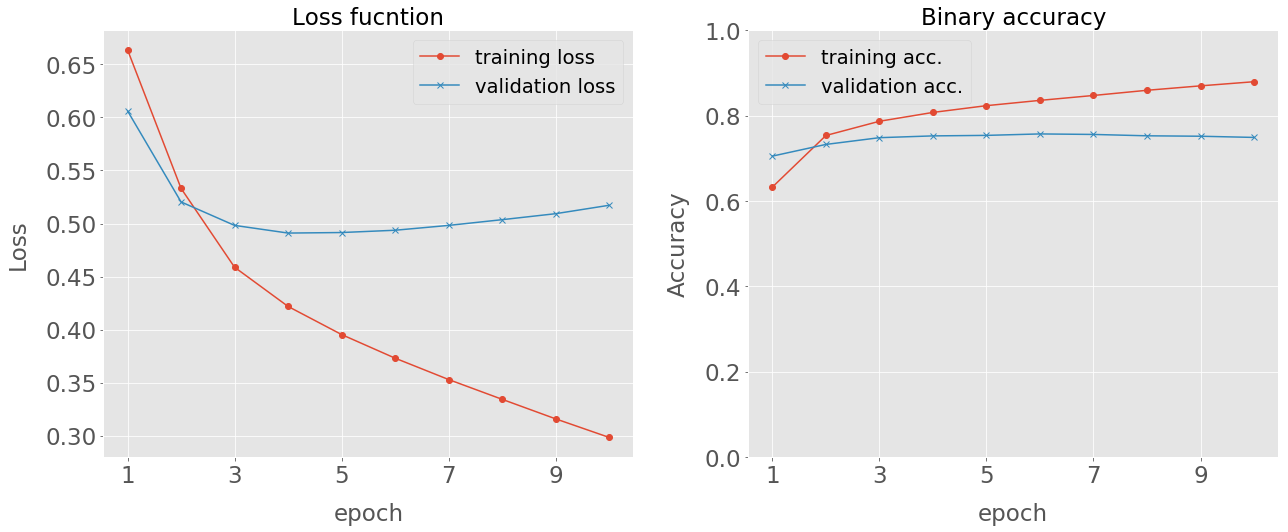

In [47]:
plot_history(history)

### Approach II. Recurrent Neural Network

In [49]:
max_words = 10000
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_words)

In [50]:
input_train.shape, input_test.shape

((25000,), (25000,))

In [51]:
max_sequence_length = 500
input_train = preprocessing.sequence.pad_sequences(input_train, maxlen=max_sequence_length)
input_test = preprocessing.sequence.pad_sequences(input_test, maxlen=max_sequence_length)

In [52]:
input_train.shape, input_test.shape

((25000, 500), (25000, 500))

In [59]:
model = Sequential()
model.add(Embedding(max_words, 32, input_length=max_sequence_length)) # Embedding(max_words, 32) will also do
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [60]:
history = model.fit(
    input_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 130s 7ms/step - loss: 0.6150 - binary_accuracy: 0.6404 - val_loss: 0.4414 - val_binary_accuracy: 0.8050
Epoch 2/10
20000/20000 [==============================] - 132s 7ms/step - loss: 0.3804 - binary_accuracy: 0.8368 - val_loss: 0.3668 - val_binary_accuracy: 0.8524
Epoch 3/10
20000/20000 [==============================] - 133s 7ms/step - loss: 0.3034 - binary_accuracy: 0.8803 - val_loss: 0.3773 - val_binary_accuracy: 0.8378
Epoch 4/10
20000/20000 [==============================] - 133s 7ms/step - loss: 0.2642 - binary_accuracy: 0.8955 - val_loss: 0.4536 - val_binary_accuracy: 0.7852
Epoch 5/10
20000/20000 [==============================] - 134s 7ms/step - loss: 0.2139 - binary_accuracy: 0.9185 - val_loss: 0.3932 - val_binary_accuracy: 0.8354
Epoch 6/10
20000/20000 [==============================] - 134s 7ms/step - loss: 0.1702 - binary_accuracy: 0.9375 - val_loss: 0.4108 - val_bin

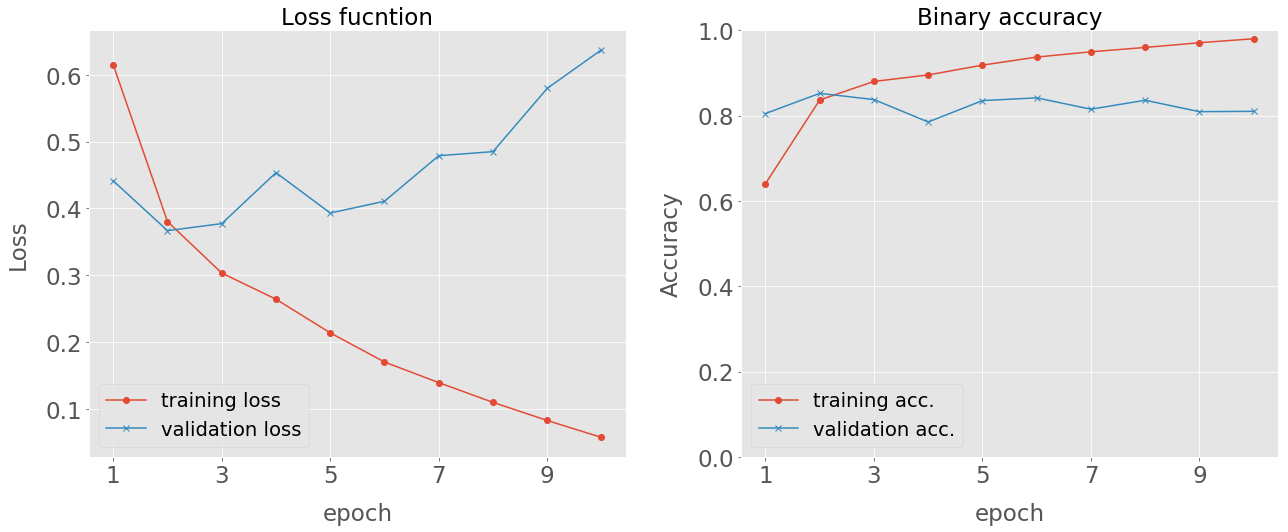

In [61]:
plot_history(history)

### LSTM RNN

In [ ]:
max_words = 10000
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_words)

max_sequence_length = 500
input_train = preprocessing.sequence.pad_sequences(input_train, maxlen=max_sequence_length)
input_test = preprocessing.sequence.pad_sequences(input_test, maxlen=max_sequence_length)

In [63]:
model = Sequential()
model.add(Embedding(max_words, 32, input_length=max_sequence_length)) # Embedding(max_words, 32) will also do
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [65]:
history = model.fit(
    input_train,
    y_train,
    epochs=6,
    batch_size=32,
    validation_split=0.2
)


Train on 20000 samples, validate on 5000 samples
Epoch 1/6
20000/20000 [==============================] - 528s 26ms/step - loss: 0.1679 - binary_accuracy: 0.9412 - val_loss: 0.2731 - val_binary_accuracy: 0.8958
Epoch 2/6
20000/20000 [==============================] - 541s 27ms/step - loss: 0.1539 - binary_accuracy: 0.9460 - val_loss: 0.2877 - val_binary_accuracy: 0.8860
Epoch 3/6
20000/20000 [==============================] - 541s 27ms/step - loss: 0.1463 - binary_accuracy: 0.9485 - val_loss: 0.3654 - val_binary_accuracy: 0.8630
Epoch 4/6
20000/20000 [==============================] - 541s 27ms/step - loss: 0.1405 - binary_accuracy: 0.9516 - val_loss: 0.3071 - val_binary_accuracy: 0.8822
Epoch 5/6
20000/20000 [==============================] - 544s 27ms/step - loss: 0.1338 - binary_accuracy: 0.9544 - val_loss: 0.3122 - val_binary_accuracy: 0.8870
Epoch 6/6
20000/20000 [==============================] - 593s 30ms/step - loss: 0.1243 - binary_accuracy: 0.9576 - val_loss: 0.3668 - val_bin

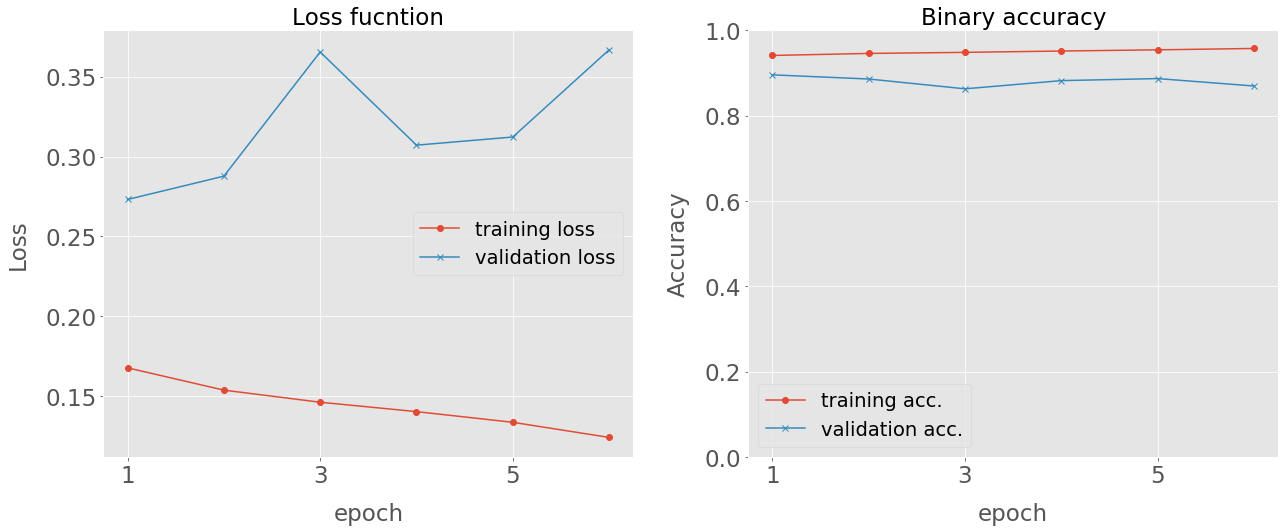

In [66]:
plot_history(history)